In [1]:
import matplotlib.pyplot as plt
import torch

from helper import *

## Plot MCP, l0 and l1 penalties and their prox

In [2]:
def penalty(inputs, t, hard=True, old=True, beta=1):
    if not hard:
        out = torch.abs(inputs)
    else:
        if old:
            out = 1 * (torch.abs(inputs) != 0)
        else:
            # beta=1
            out = (t*torch.abs(inputs) - torch.pow(inputs,2)/(2*beta)) * (torch.abs(inputs) <= beta*t) \
                    + (beta* t**2 / 2) * (torch.abs(inputs) > beta*t)
    return out

/var/folders/st/_q3p7lz50mncs1x1m22w92gc0000gn/T/ipykernel_77421/3555842275.py:1: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  x = torch.range(-2, 2, 0.025)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


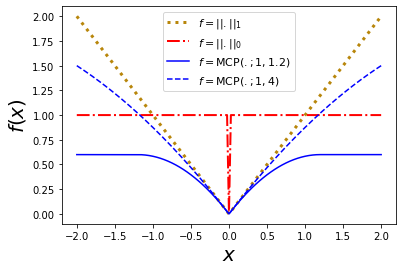

In [17]:
x = torch.range(-2, 2, 0.025)
t = torch.tensor(1)
softthres = penalty(x, t, hard=False)
hardthres = penalty(x, t, hard=True, old=True)
ssthres1 = penalty(x, t, hard=True, old=False, beta=1.2)
ssthres2 = penalty(x, t, hard=True, old=False, beta=4)
plt.plot(x, softthres.detach().numpy(), ':', lw=3, color="darkgoldenrod", label=r"$f=\|\|.\|\|_1$")
plt.plot(x, hardthres.detach().numpy(), '-.', lw=2, color="red", label=r"$f=\|\|.\|\|_0$")
plt.plot(x, ssthres1.detach().numpy(), '-', color="blue", label=r"$f=\mathrm{MCP}(.; 1, 1.2)$")
plt.plot(x, ssthres2.detach().numpy(), '--', color="blue", label=r"$f=\mathrm{MCP}(.; 1, 4)$")
plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'$f(x)$', fontsize=20)
plt.legend(fontsize=11)
plt.savefig('thres-penalty.eps', format='eps', bbox_inches='tight')
plt.show()

In [ ]:
def thres(inputs, t, hard=True, old=True, gamma=0.95, beta=1):
    if not hard:
        out = torch.sign(inputs) * torch.max(torch.abs(inputs)- t, torch.zeros(inputs.shape))
    else:
        if old:
            out = inputs * (torch.abs(inputs) > t)
        else:
            #gamma, beta = 0.95, 1
            out = inputs * (torch.abs(inputs) > torch.sqrt(gamma * beta * t**2)) * (beta <= gamma) \
                    + torch.sign(inputs) * torch.min(beta/(beta - gamma) * torch.max(torch.abs(inputs) - (t * gamma), torch.zeros(inputs.shape)), torch.abs(inputs)) * (beta > gamma)
    return out

/var/folders/st/_q3p7lz50mncs1x1m22w92gc0000gn/T/ipykernel_77421/4120147708.py:1: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  x = torch.range(-0.1, 0.1, 0.0025)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


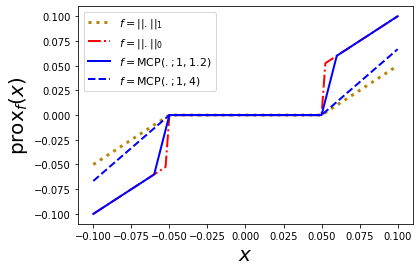

In [24]:
x = torch.range(-0.1, 0.1, 0.0025)
t = torch.tensor(0.05)
softthres = thres(x, t, hard=False)
hardthres = thres(x, t, hard=True, old=True)
ssthres_hard = thres(x, t, hard=True, old=False, gamma=1, beta=1.2)
ssthres_softer = thres(x, t, hard=True, old=False, gamma=1, beta=4)
plt.plot(x, softthres.detach().numpy(), ':', lw=3, color="darkgoldenrod", label=r"$f=\|\|.\|\|_1$")
plt.plot(x, hardthres.detach().numpy(), '-.', lw=2, color="red", label=r"$f=\|\|.\|\|_0$")
plt.plot(x, ssthres_hard.detach().numpy(), '-',lw=2, color="blue", label=r"$f=\mathrm{MCP}(.; 1, 1.2)$")
plt.plot(x, ssthres_softer.detach().numpy(), '--', lw=2, color="blue", label=r"$f=\mathrm{MCP}(.; 1, 4)$")
plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'$\mathrm{prox}_f(x)$', fontsize=20)
plt.legend(fontsize=11)
plt.savefig('thres.eps', format='eps', bbox_inches='tight')
plt.show()